In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
country = 'India'
df = pd.read_csv("../../../data/processed/co2_country.csv", index_col='year', parse_dates=True)
df = df.loc[df['country'] == country, ['co2']]
df.head()

,co2
year,
1950-01-01,61.103
1951-01-01,64.022
1952-01-01,67.426
1953-01-01,68.705
1954-01-01,72.414


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['co2'].values.reshape(-1, 1))

In [5]:
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size,:], data[train_size:,:]

In [6]:
# Create the training and testing datasets
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [7]:

time_steps = 1
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0741
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0722
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0703
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0685
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0667
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0649
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0631
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0613
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0596
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0579
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0563
Epoch 12/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0546
Epoch 13/100
1/1 [==============================]

In [10]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])


1/1 [==============================] - 0s 27ms/step


In [11]:
train_score = np.sqrt(np.mean(np.square(y_train - train_predictions)))
test_score = np.sqrt(np.mean(np.square(y_test - test_predictions)))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))


Train Score: 690.04 RMSE
Test Score: 231.46 RMSE


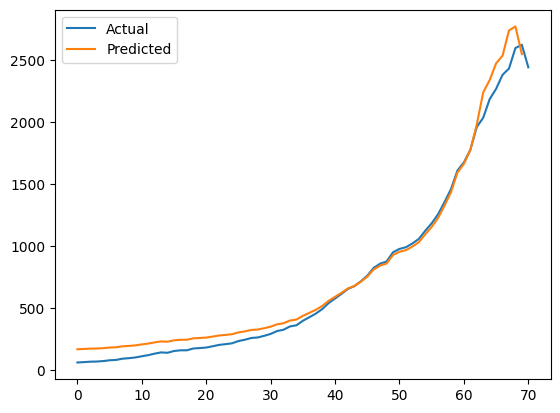

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['co2'].values[:-1], label='Actual')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted')
plt.legend()
plt.show()

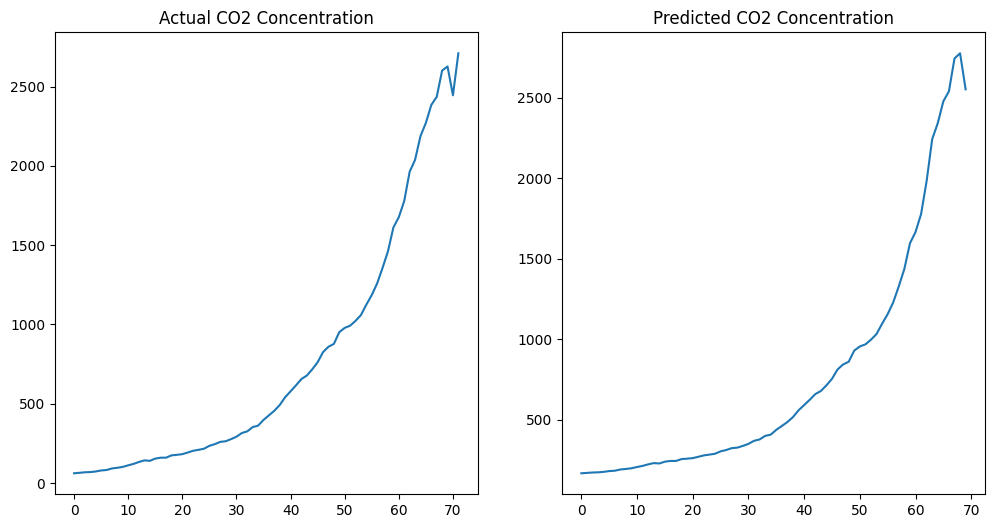

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(df['co2'].values)
ax1.set_title('Actual CO2 Concentration')

ax2.plot(np.concatenate([train_predictions, test_predictions]))
ax2.set_title('Predicted CO2 Concentration')

plt.show()


In [17]:
last_time_steps = data[-time_steps:]
future_predictions = []
for i in range(5): 
    next_prediction = model.predict(last_time_steps.reshape(1, time_steps, 1))
    future_predictions.append(next_prediction[0,0])
    last_time_steps = np.concatenate([last_time_steps[1:], next_prediction], axis=0)


1/1 [==============================] - 0s 32ms/step


In [18]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

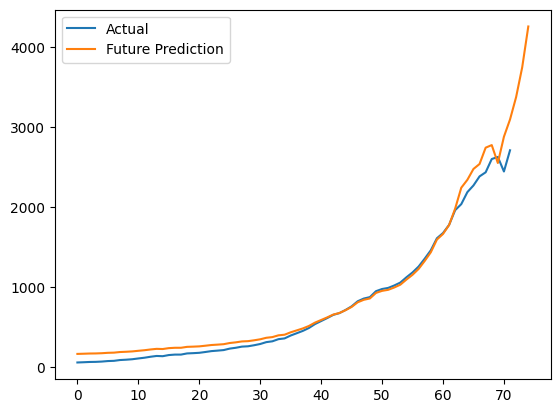

In [19]:
plt.plot(df['co2'].values, label='Actual')
plt.plot(np.concatenate([train_predictions, test_predictions, future_predictions]), label='Future Prediction')
plt.legend()
plt.show()